In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("exp8_clean_data.csv",header=0)

In [4]:
df.head()

,Unnamed: 0,AGGNo,RTI T2,RTI T3,AGG No.,Varma code,Struct_pop,Species
0,0,50005,0.851353,0.361075,50005.0,Oyali_073,Ret_1,reticulatum
1,1,50015,0.875511,0.450087,50015.0,Oyali_100,Ret_1,reticulatum
2,2,49787,0.876730,0.459763,49787.0,Bari1_062,Ret_8,reticulatum
3,3,49805,0.877189,0.468325,49805.0,Bari2_064,Ret_7,reticulatum
4,4,49799,0.879161,0.472980,49799.0,Bari1_092,Ret_8,reticulatum


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

In [15]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [29]:
pal = sns.color_palette("Greys", 212)

In [16]:
colors= sns.color_palette("tab10")

In [18]:
df.shape

(212, 8)

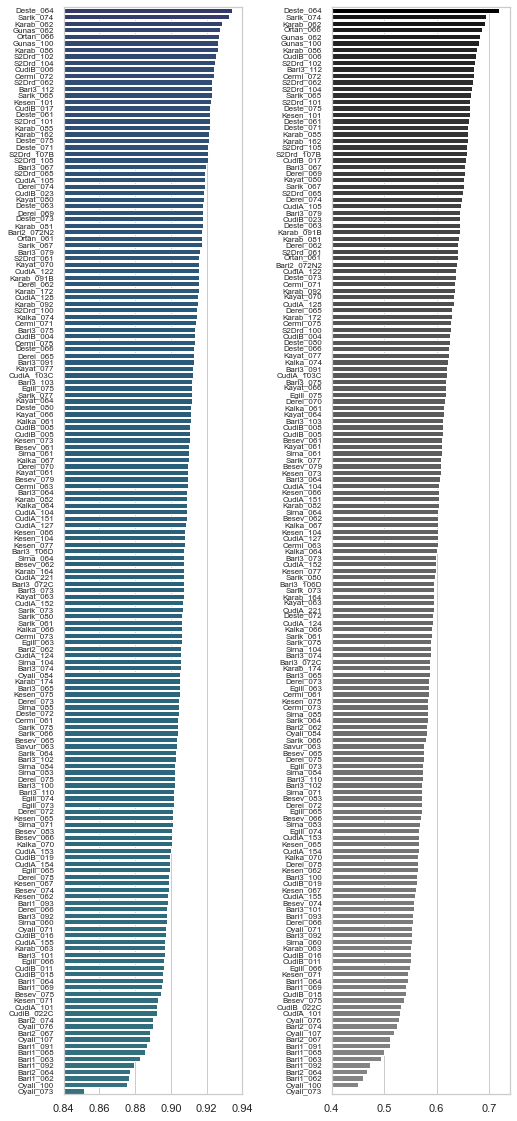

In [42]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,2,figsize=(8,20))

#sort
dfT2 = df.sort_values(by="RTI T2",ascending=False)
dfT3 = df.sort_values(by="RTI T3",ascending=False)

#bar plot
#sns.set_color_codes("pastel")
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

cc0=dfT2["RTI T2"].values
sns.barplot(ax=ax[0], x="RTI T2", y="Varma code", data=dfT2,
            label="RTI T2", palette=colors_from_values(cc0, "crest"))

cc1=dfT3["RTI T3"].values
sns.barplot(ax=ax[1], x="RTI T3", y="Varma code", data=dfT3,
            label="RTI T3", palette=colors_from_values(cc1, "Greys"))

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8)

ax[0].set_xlabel('', fontsize=10)
ax[1].set_xlabel('', fontsize=10)
ax[0].set(xlim=(0.84, 0.94), ylabel="")
ax[1].set(xlim=(0.4, 0.74), ylabel="")
#sns.despine(left=True, bottom=True)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [43]:
colors=sns.color_palette("tab10")

In [44]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

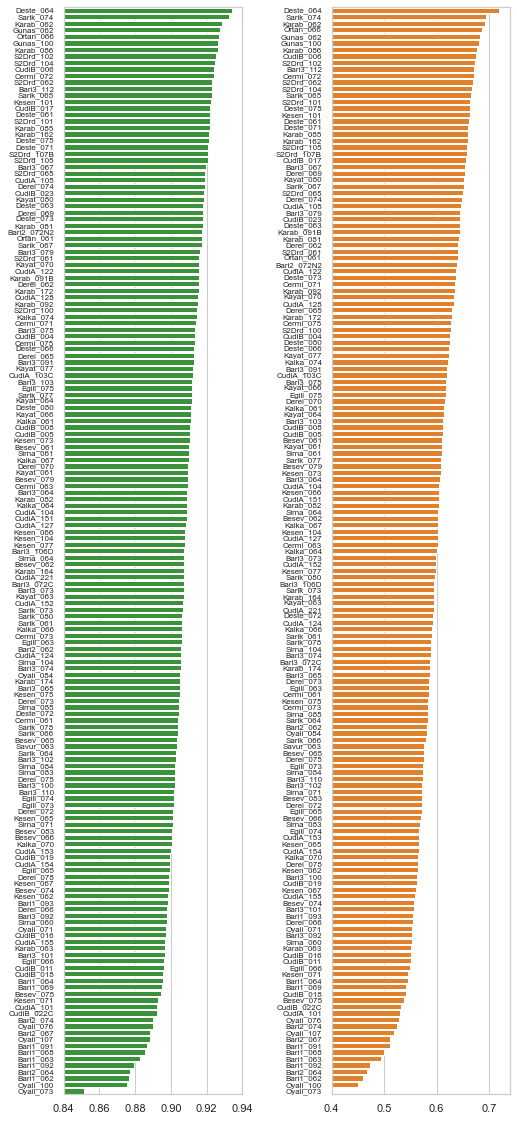

In [46]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,2,figsize=(8,20))

#sort
dfT2 = df.sort_values(by="RTI T2",ascending=False)
dfT3 = df.sort_values(by="RTI T3",ascending=False)

#bar plot
#sns.set_color_codes("pastel")
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

sns.barplot(ax=ax[0], x="RTI T2", y="Varma code", data=dfT2,
            label="RTI T2", color=colors[2])

sns.barplot(ax=ax[1], x="RTI T3", y="Varma code", data=dfT3,
            label="RTI T3", color=colors[1])

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8)

ax[0].set_xlabel('', fontsize=10)
ax[1].set_xlabel('', fontsize=10)
ax[0].set(xlim=(0.84, 0.94), ylabel="")
ax[1].set(xlim=(0.4, 0.74), ylabel="")
#sns.despine(left=True, bottom=True)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [47]:
f.savefig("Exp8_T2T3_distribution2.png",dpi=600,bbox_inches = 'tight')

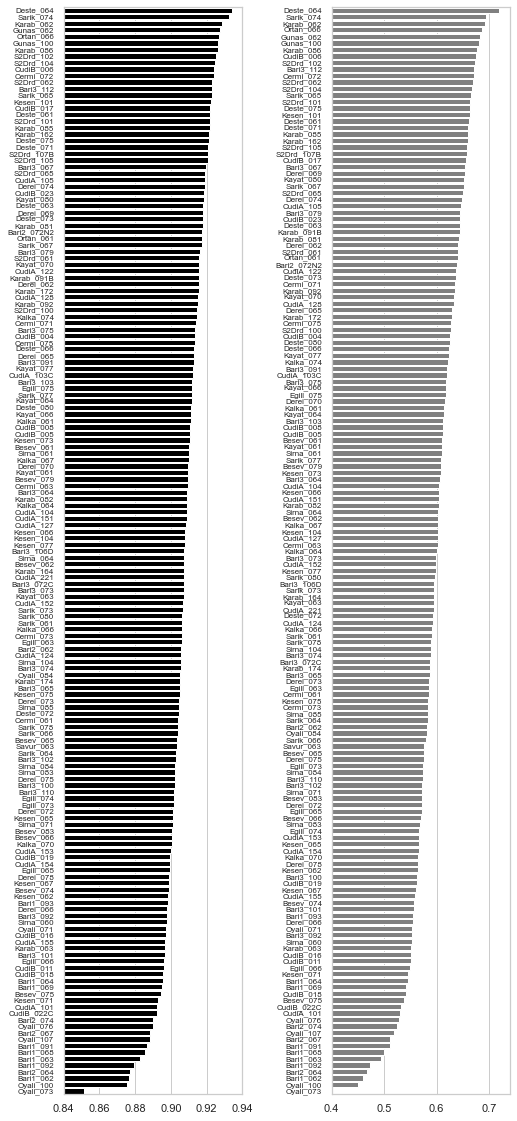

In [48]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,2,figsize=(8,20))

#sort
dfT2 = df.sort_values(by="RTI T2",ascending=False)
dfT3 = df.sort_values(by="RTI T3",ascending=False)

#bar plot
#sns.set_color_codes("pastel")
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

sns.barplot(ax=ax[0], x="RTI T2", y="Varma code", data=dfT2,
            label="RTI T2", color="black")

sns.barplot(ax=ax[1], x="RTI T3", y="Varma code", data=dfT3,
            label="RTI T3", color="grey")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8)

ax[0].set_xlabel('', fontsize=10)
ax[1].set_xlabel('', fontsize=10)
ax[0].set(xlim=(0.84, 0.94), ylabel="")
ax[1].set(xlim=(0.4, 0.74), ylabel="")
#sns.despine(left=True, bottom=True)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [49]:
f.savefig("Exp8_T2T3_distribution3.png",dpi=600,bbox_inches = 'tight')